<a href="https://www.kaggle.com/code/tanavbajaj/linear-regression?scriptVersionId=100443811" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center> Linear Regression on Random and Delhi House Dataset</center>

# Table of Contents
<a id="toc"></a>
- [Regression](#1)
- [Linear Regression](#2)
- [Linear Regression on Random Dataset](#3)
    - [Generating Random Dataset and Plotting the Points](#4)
    - [How do we decide best-fit line?](#5)
    - [Train Test Split](#6)
    - [Fit the model](#7)
    - [Predicting Values using m and c](#7.2)
    - [Plot the line](#7.3)
    - [Calculating the accuracy score of the dataset](#8)
- [Linear Regression Using Sklearn](#9)    
- [Delhi House Prediction Dataset](#10)
    - [Plotting the Dataset](#10.1)
    - [Simple Linear Regression using Area to predict Price](#10.2)
    - [Multivariable Linear Regression to predict Price using Area, BHK and Number of Bathrooms](#10.3)
    

<a id="1"></a>
# Regression


 There are situations in daily life where we want to know the relationship between various factors for example if the price of petrol increases would it affect the sales of cars or does change the location of the house will it affect the price. The process of finding this relationship between multitudes of factors is known as regression 
in more formal words regression refers to the study of the nature of the relationship between the variables so that one may be able to predict the unknown value of one variable for a known value of another variable.

To better understand the regression we need to be familiar with two terms 

**Independent variable:-**  These refer to the factors or the variables based upon which the situation is analyzed. These variables don't change and are used to indicate details about the dependent variable. 
**Dependent variable:-**  It refers to the result i.e. the sales of cars or the price of the house. In formal terms, it is the factor which is affected based on the independent variables. 




<a id="2"></a>
# Linear Regression

On a dataset, if the end goal is to find some sort of linear relationship between the independent variable so that when an unknown point is given a prediction can be made. In the case where there is only 1 independent feature, it is called Uni-variate linear regression and if there are multiple features it is called Multiple linear regression

In the case of Univariate linear regression a line is formed on a 2-D plane that shows the linear relationship between the independent and dependent variables. While in the case of multivariate linear regression a hyperplane is formed. 


![](https://www.researchgate.net/profile/Hieu-Tran-17/publication/333457161/figure/fig3/AS:763959762247682@1559153609649/Linear-Regression-model-sample-illustration.ppm)

![](https://miro.medium.com/max/602/0*Bsjmsbn0hJNX6ZuH)

A regression model tries to find a function which would suitably fit the training data and predict with accuracy the training data

In the case of linear regression it is a linear function of the form:

y= m1x1 + m2x2 + m3x3 ..... + b

- Where y denotes the predicted value (dependent variable)


- b is called the bias term or the offset


- m1, m2 ,m3 are called the modal parameters (these are the values which our modal tries to learn using the training data)


- x1, x2, x3 are called the feature values (independent variables)


<a id="3"></a>
# Linear regression on Random dataset

To understand anything the best way is to by understanding how it works under the hood let's start by generating a random data set to test our linear regression algorithm


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id="4"></a>
## Generating Random Dataset and Plotting the Points

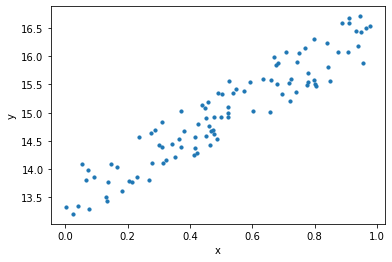

In [2]:
np.random.seed(7)
x = np.random.rand(100, 1)
y = 13 + 3 * x + np.random.rand(100, 1)
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


The above code sets the random seed to 7 i.e. when the rand function of the numpy tries to generate random numbers it will end up generating the same numbers on each iteration this is done so as to ensure the same values x
Next let the value of y at each x is given by 
y= 15 + 2x + random(x)

<a id="5"></a>
# How do we decide best-fit line?

what does the best fit line actually represent? It acts as the line which tells us for a particular value of x what might be the value of y. 
So the best fit line is y = mx + c and the regression model needs to calculate the value of m and c using the training data set 


But it is possible that the actual value of y might not be equal to the predicted value in that case the difference between the predicted value and the actual value is called **residuals**.  So the best fit line is a line which divides the data into equal parts along with minimum residuals.
The values of m and c are found using differentiation and the results are:
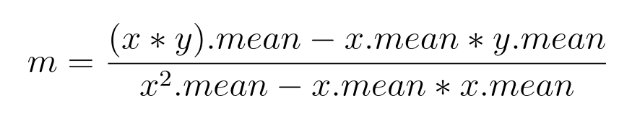
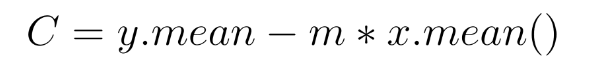

Now we know what are the values of m and c in best fit line so we can try to code linear regression ourselves

<a id="6"></a>
# Train Test Split

In [3]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.3)



<a id="7"></a>
# Fit the Model 
<a id="7.1"></a>
## Getting Values of m and c from the model

In [4]:
def fit(X_train, Y_train):
   numerator = (X_train * Y_train).mean() - X_train.mean() * Y_train.mean()
   denominator = (X_train ** 2).mean() - X_train.mean() ** 2
   m = numerator / denominator
   c = Y_train.mean() - m * X_train.mean()
   return m, c


<a id="7.2"></a>
## Predicting Values using m and c

In [5]:
def predict(X_test, m, c):
   Y_pred = m * X_test + c
   return Y_pred


In [6]:
m, c = fit(X_train, Y_train)
y_pred = predict(X_test, m, c)
print("The value of m and c are:", m, c)


The value of m and c are: 3.179373534213082 13.345249192874231


<a id="7.3"></a>
## Plot of line
Using the values of m and c here is what the best fit line will look like

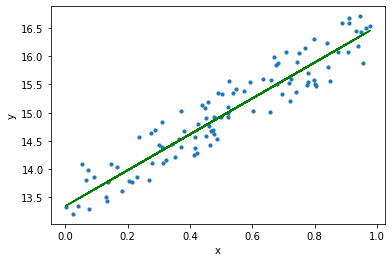

In [7]:
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,m*x+c, color='green')
plt.show()

<a id="8"></a>
# Calculating the accuracy score of the dataset

The accuracy of a regression algorithm can be understood as ratio of the absolute errors to the mean of actual values i.e. how far are the values from the mean of the actual data


In [8]:
def score(Y_test, Y_pred):
   u = ((Y_test - Y_pred) ** 2).sum()
   v = ((Y_test - Y_test.mean()) ** 2).sum()
   r2 = 1 - u / v
   return r2

In [9]:
print("Accuracy of the model",score(Y_test, y_pred)*100,"%")

Accuracy of the model 90.19146151426827 %


The above code was making Linear Regression from scratch. This can be done very easily using the Sklearn Library

<a id="9"></a>
# Linear Regression Using Sklearn

In [10]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [11]:
Y_pred = linear.predict(X_test)
print("Accuracy Score for Test Dataset is ",linear.score(X_test, Y_test)*100,"%")
print("Accuracy Score for Train Dataset is",linear.score(X_train,Y_train)*100,"%")

Accuracy Score for Test Dataset is  90.19146151426824 %
Accuracy Score for Train Dataset is 88.42863198257054 %


In [12]:
c1=float(linear.intercept_)
m1=float(linear.coef_)
print("Intercept of regression line is", c1)
print("Coefficient of regression line is", m1)

Intercept of regression line is 13.345249192874208
Coefficient of regression line is 3.1793735342131266


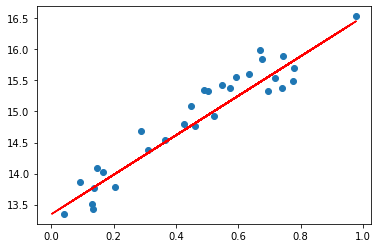

In [13]:
plt.scatter(X_test,Y_test)
plt.plot(x,m1*x+c1,color='red')

<a id="10"></a>
# Delhi House Prediction Dataset

In [14]:
df=pd.read_csv('../input/delhi-house-price-prediction/MagicBricks.csv')

<a id="10.1"></a>
## Plotting the Dataset

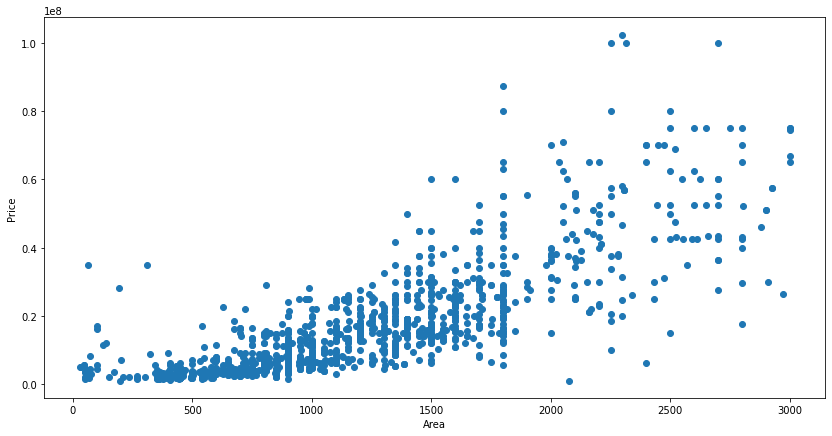

In [15]:
df.drop(df[df['Area'] > 3000].index, inplace = True)
plt.figure(figsize=(14,7))
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.Area,df.Price)

<a id="10.2"></a>
## Simple Linear Regression using Area to predict Price

In [16]:
X=np.array(df[['Area']])
y=np.array(df.Price)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
linear.fit(X_train,y_train)
Y_pred = linear.predict(X_test)
print(f"Accuracy of Test Data is {round(linear.score(X_test, y_test)*100,2)}%")
print(f"Accuracy of Training Data is {round(linear.score(X_train, y_train)*100,2)}%")

Accuracy of Test Data is 65.98%
Accuracy of Training Data is 61.48%


In [17]:
c2=float(linear.intercept_)
m2=float(linear.coef_)
print("Intercept of regression line is", c2)
print("Coefficient of regression line is", m2)

Intercept of regression line is -8179518.897569224
Coefficient of regression line is 21078.39320313634


<a id="10.3"></a>
## Multivariable Linear Regression to predict Price using Area, BHK and Number of Bathrooms

In [18]:
df.dropna(inplace=True)
X=np.array(df[['Area','BHK','Bathroom']])
y=np.array(df.Price)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
linear.fit(X_train,y_train)
Y_pred = linear.predict(X_test)
print(f"Accuracy of Test Data is {round(linear.score(X_test, y_test)*100,2)}%")
print(f"Accuracy of Training Data is {round(linear.score(X_train, y_train)*100,2)}%")

Accuracy of Test Data is 65.03%
Accuracy of Training Data is 68.28%


### The lower accuracy for the Delhi house prediction is because as observed in the graph a line cannot best fit the data. 